# Práctica - Keras y Redes Convolucionales
## Redes neuronales de convolución (CNN)
Como vamos a ver, las capas de convolución se implementan de manera muy fácil y sencilla con KERAS. Para ello vamos a recordar que las capas convolucionales constan de una primera capa de convolución seguida (normalmente) de una capa de pooling. Las capas de convolución 2D, como las que vamos a usar, funcionan con inputs bidimensionales. Por tanto, la imagen debe conservar su estructura de grid 28x28 y no transformarlo a 1D como hacíamos en los casos anteriores. Eso sí, si posteriormente a las capas convolucionales se va a añadir una capa densa será necesario redimensionarlo a 1D. ESta redimensionalización a 1D en un momento concreto de la secuencia de capas se consigue utilizando el comando `layer_flatten()`, que básicamente concateniza los inputs. Para las capas de convolución y de pooling, las funciones a usar son `layer_conv_2d()` y `layer_max_pooling_2d()`. En cuanto a la capa de convolución, los parámetros a modificar incluyen el número de mapas por capa (`filters = 32` en el código), el tamaño bidimensional del kernel (`kernel_size = 3x3` en el código) y la función de activación. En cuanto al pooling, el tamaño del pooling se especifica mediante el parámteros pool_size. En el siguiente ejemplo podemos ver una implementación de una red convolucional con una capa densa al final de 128 neuronas ocultas.

https://docs.gimp.org/2.6/en/plug-in-convmatrix.html

In [2]:
import keras
from keras import layers
import tensorflow.keras as tk
import numpy as np
from keras.utils import to_categorical
import sys

In [3]:
import matplotlib.pyplot as plt

In [48]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

In [49]:
## matriz de salida (neuronas de salida)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train / 255
x_test = x_test / 255

In [50]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(rate = 0.25))
model1.add(keras.layers.Flatten()) 
model1.add(layers.Dense(units = 128, activation = "relu")) 
model1.add(layers.Dropout(rate = 0.5))
model1.add(layers.Dense(units = 10, activation = "softmax")) 

model1.compile(
  optimizer = 'adadelta',
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

history1 = model1.fit(x_train, y_train, epochs = 3, batch_size = 100, validation_split = 0.2)


Epoch 1/3
480/480 [==============================] - 7s 14ms/step - loss: 2.2926 - accuracy: 0.1098 - val_loss: 2.2792 - val_accuracy: 0.1308
Epoch 2/3
480/480 [==============================] - 7s 14ms/step - loss: 2.2808 - accuracy: 0.1303 - val_loss: 2.2659 - val_accuracy: 0.1825
Epoch 3/3
480/480 [==============================] - 7s 14ms/step - loss: 2.2689 - accuracy: 0.1505 - val_loss: 2.2523 - val_accuracy: 0.2412


In [51]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

Fijaros en como se ha reducido el tamaño de la imagen en cada capa de convolución. Esto se debe a que el kernel se va desplazando horizontal y verticalmente a través de la imagen haciendo recuadros de 3x3, y el número de recuadros de 3x3 que ocupan un cuadro de 28x28, desplazándose una unidad en la longitud horizontal (o vertical) son 26. La longitud del desplazamiento tanto en la horizontal como en la vertical se regula mediante el parámetro stride (en el caso anterior `stride = 1`). Si incrementásemos el valor del parámetro stride, el grid resultante de la capa de convolución tendría una resolución menor. Una manera de evitar la reducción del grid en cada capa de convolución es incluyendo filas y columnas de 0s. De esta manera, si incrementamos la dimensión del grid inicial de 28x28 a 30x30, siendo las dimensiones añadidas 0s, la reducción de la dimensión de la capa de convolución nos devolvería al grid original de 28x28, evitando por tanto la pérdida de información. Añadir columnas y filas de 0s se hace con el parámetro padding. En el siguiente ejemplo vamos a ver como implementarlo:

In [52]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding = 'same'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(rate = 0.25))
model2.add(keras.layers.Flatten()) 
model2.add(layers.Dense(units = 128, activation = "relu")) 
model2.add(layers.Dropout(rate = 0.5))
model2.add(layers.Dense(units = 10, activation = "softmax")) 

model2.compile(
  optimizer = 'adadelta',
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

history2 = model2.fit(x_train, y_train, epochs = 3, batch_size = 100, validation_split = 0.2)


Epoch 1/3
480/480 [==============================] - 9s 18ms/step - loss: 2.2855 - accuracy: 0.1353 - val_loss: 2.2634 - val_accuracy: 0.2626
Epoch 2/3
480/480 [==============================] - 9s 18ms/step - loss: 2.2648 - accuracy: 0.1627 - val_loss: 2.2387 - val_accuracy: 0.3169
Epoch 3/3
480/480 [==============================] - 8s 17ms/step - loss: 2.2425 - accuracy: 0.1945 - val_loss: 2.2126 - val_accuracy: 0.3696


In [53]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2304)            

Fijaros como tras la primera convolución hemos mantenido la dimensión original de 28x28, mientras que tras la segunda capa de convolución (donde no incluimos filas y columnas de 0s) el tamaño del grid se ha reducido a 26x26.

Además, vemos como para tan solo 3 épocas se alcanzan valores de accuracy muy altos.

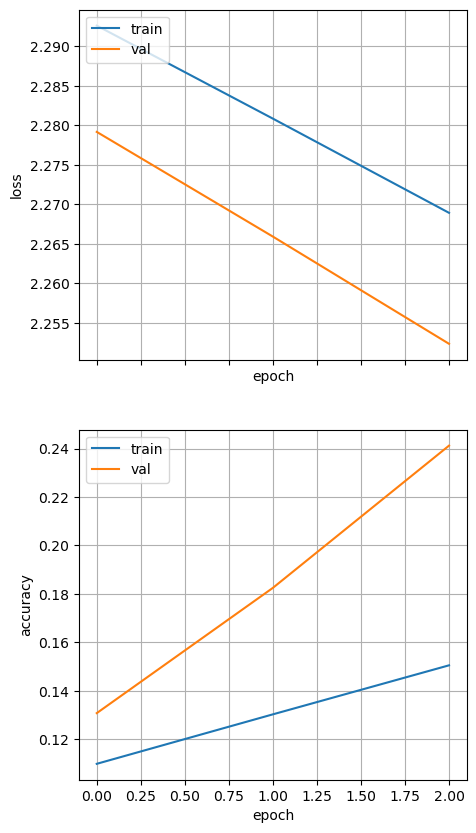

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize = (5, 10))

ax1.plot(history1.history['loss'])
ax1.plot(history1.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history1.history['accuracy'])
ax2.plot(history1.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

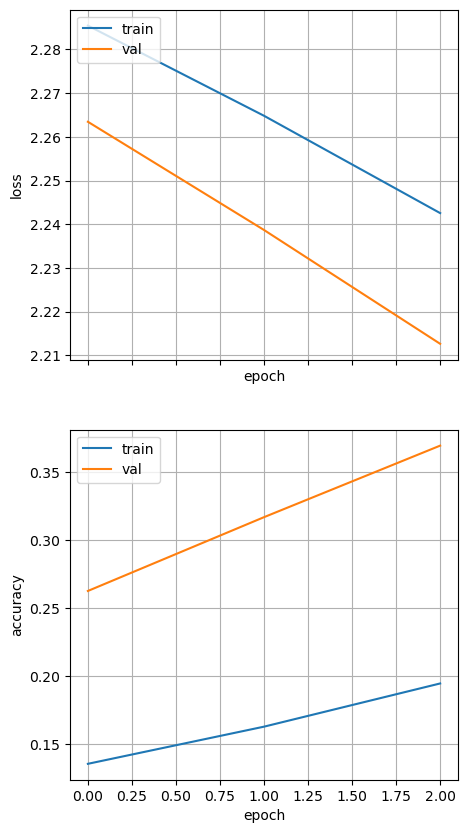

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize = (5, 10))

ax1.plot(history2.history['loss'])
ax1.plot(history2.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history2.history['accuracy'])
ax2.plot(history2.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

# Cifar Denoise AutoEncoder

Un autoencoder es un tipo de red neuronal artificial que se utiliza para aprender representaciones eficientes de datos de entrada sin supervisión. Consiste en dos partes principales: un codificador y un decodificador.

El codificador toma la entrada y la comprime en una representación de dimensionalidad inferior llamada código latente.
El decodificador toma el código latente y lo reconstruye de nuevo en la salida original.
El objetivo principal de un autoencoder es aprender una representación eficiente de los datos de entrada al minimizar la diferencia entre la entrada y la salida reconstruida, generalmente medida por alguna función de pérdida, como el error cuadrático medio.

Los autoencoders son útiles en muchas aplicaciones, como la reducción de dimensionalidad, la eliminación de ruido en datos, la generación de imágenes y la inicialización de redes neuronales profundas. Además, se pueden utilizar para la detección de anomalías y la extracción de características en tareas de aprendizaje no supervisado.

In [4]:
num_classes = 10

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

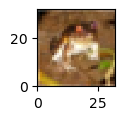

In [6]:
fig = plt.figure(figsize = (1, 1))
plt.pcolormesh(np.flipud(x_train[0,:,:]))

In [7]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [9]:
# divide x_test into validation and test
x_val = x_test[:7000]
x_test = x_test[7000:]

# Add noise to data
Añadimos ruido a nuestras imágenes con una normal con mendia 0 y parámetro de escala 1

In [10]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

In [11]:
# definition to show original image and reconstructed image
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display original
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

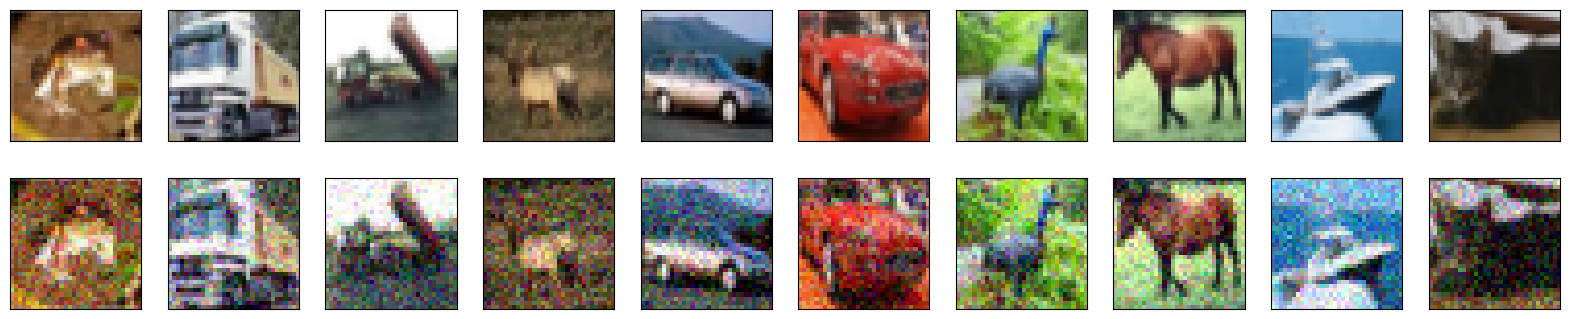

In [12]:
showOrigDec(x_train, x_train_noisy)

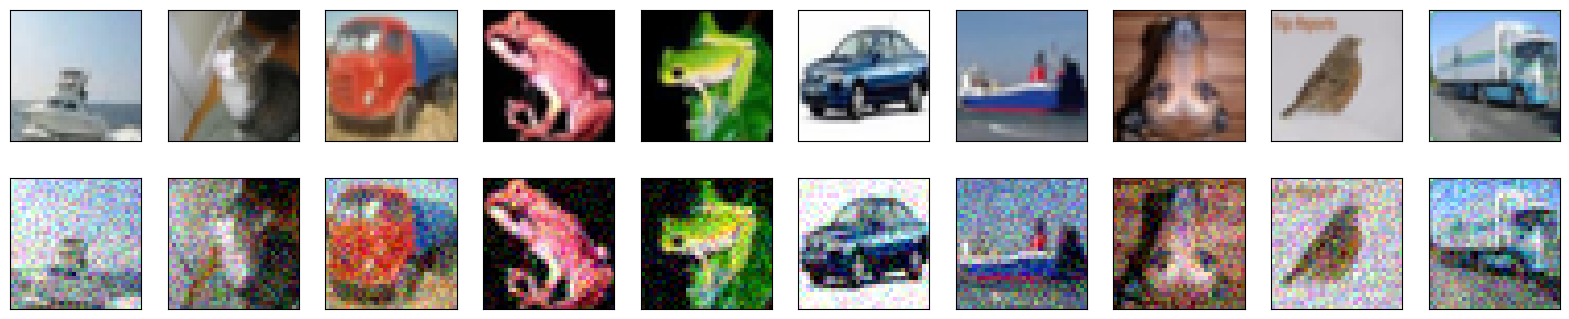

In [13]:
showOrigDec(x_train[100:], x_train_noisy[100:])

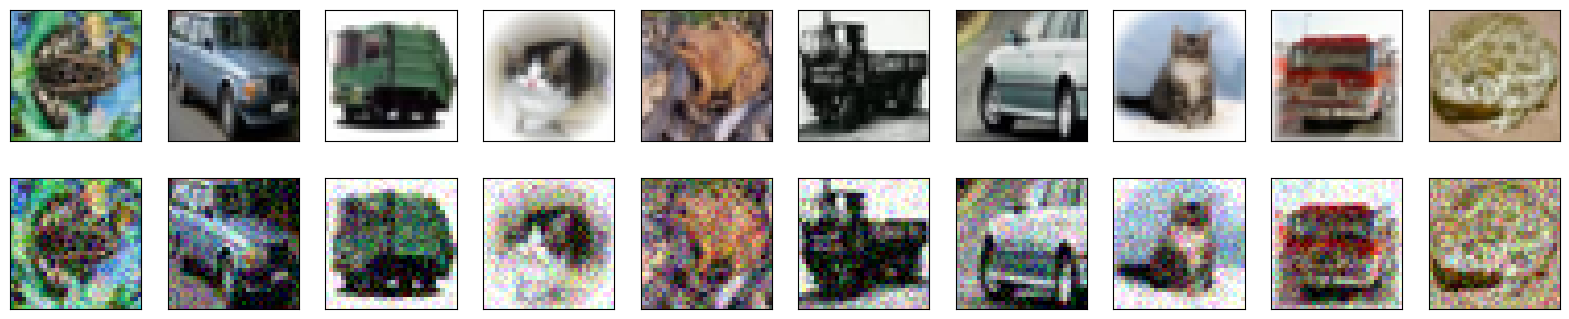

In [14]:
showOrigDec(x_train[200:], x_train_noisy[200:])

## Convolutional AutoEncoder for denoising


In [15]:
input_img = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, (3, 3), padding='same')(input_img)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(32, (3, 3), padding='same')(encoded)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
decoded = keras.layers.Activation('sigmoid')(x)

2024-02-14 18:38:29.292972: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-14 18:38:29.292996: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-14 18:38:29.293016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aura): /proc/driver/nvidia/version does not exist
2024-02-14 18:38:29.293464: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model = keras.models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])

In [17]:
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = 'AutoEncoder_Cifar10_denoise_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = keras.callbacks.ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [18]:
batch_size = 100
epochs = 100

In [19]:
history = model.fit(x_train_noisy, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val_noisy, x_val),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.6760
Epoch 1: val_loss improved from inf to 0.56623, saving model to AutoEncoder_Cifar10_denoise_weights.01-0.57-0.57.hdf5
500/500 [==============================] - 32s 63ms/step - loss: 0.5723 - accuracy: 0.6760 - val_loss: 0.5662 - val_accuracy: 0.7367
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.7416
Epoch 2: val_loss improved from 0.56623 to 0.56287, saving model to AutoEncoder_Cifar10_denoise_weights.02-0.56-0.56.hdf5
500/500 [==============================] - 30s 61ms/step - loss: 0.5618 - accuracy: 0.7416 - val_loss: 0.5629 - val_accuracy: 0.7525
Epoch 3/100
500/500 [==============================] - ETA: 0s - loss: 0.5596 - accuracy: 0.7530
Epoch 3: val_loss improved from 0.56287 to 0.56085, saving model to AutoEncoder_Cifar10_denoise_weights.03-0.56-0.56.hdf5
500/500 [==============================] - 30s 60ms/step - loss: 0.5596 - accurac

In [20]:
score = model.evaluate(x_test_noisy, x_test, verbose=1)
print(score)

94/94 [==============================] - 1s 7ms/step - loss: 0.5552 - accuracy: 0.7787
[0.5551514625549316, 0.7786624431610107]


# Visualize original image, noisy image and denoised image

In [21]:
c10test = model.predict(x_test_noisy)
c10val = model.predict(x_val_noisy)

219/219 [==============================] - 1s 7ms/step


In [22]:
print("Cifar10_test: {0}\nCifar10_val: {1}".format(np.average(c10test), np.average(c10val)))

Cifar10_test: 0.47904470562934875
Cifar10_val: 0.48257383704185486


In [23]:
# definition to show original image and reconstructed image
def showOrigDec(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

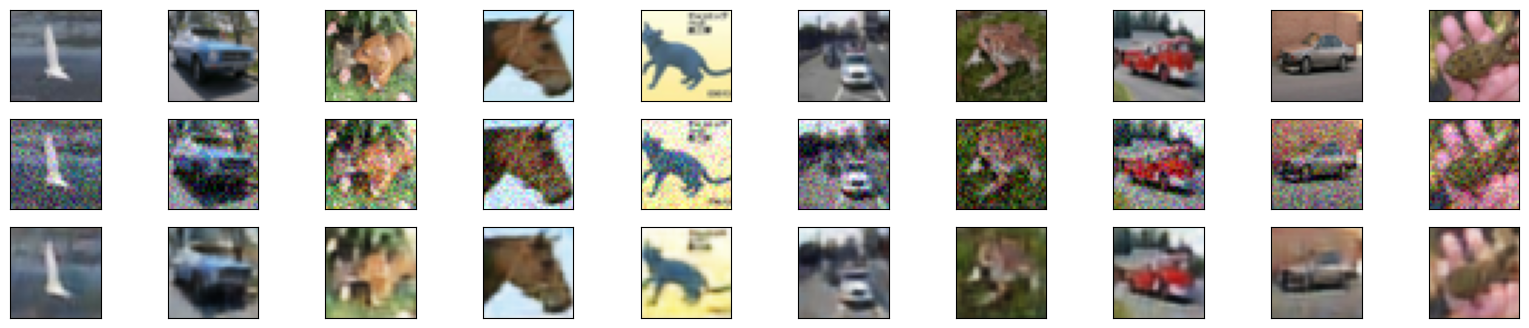

In [24]:
showOrigDec(x_test, x_test_noisy, c10test)

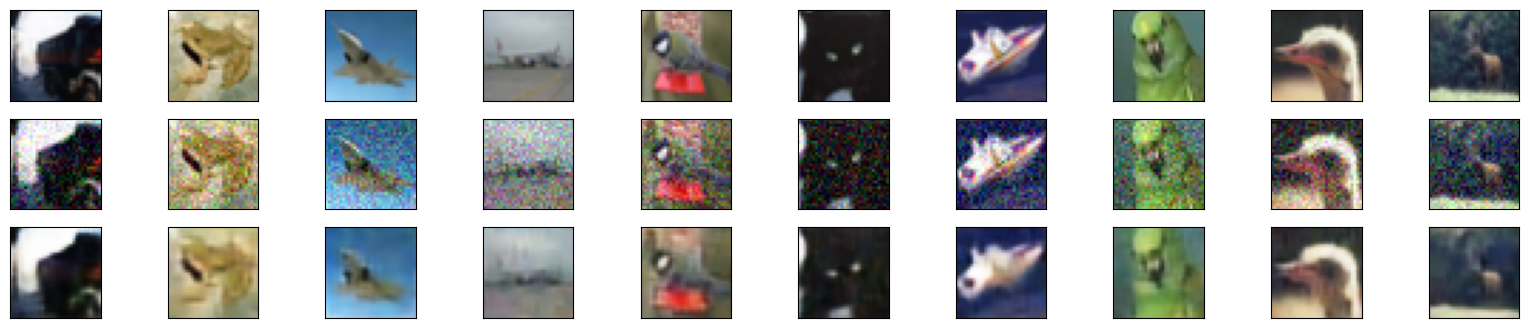

In [25]:
showOrigDec(x_test[100:], x_test_noisy[100:], c10test[100:])

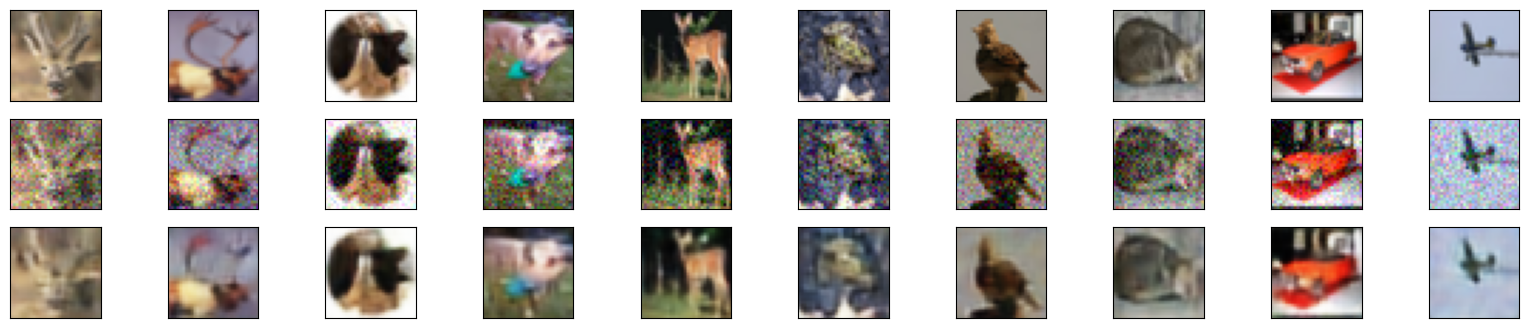

In [26]:
showOrigDec(x_test[200:], x_test_noisy[200:], c10test[200:])

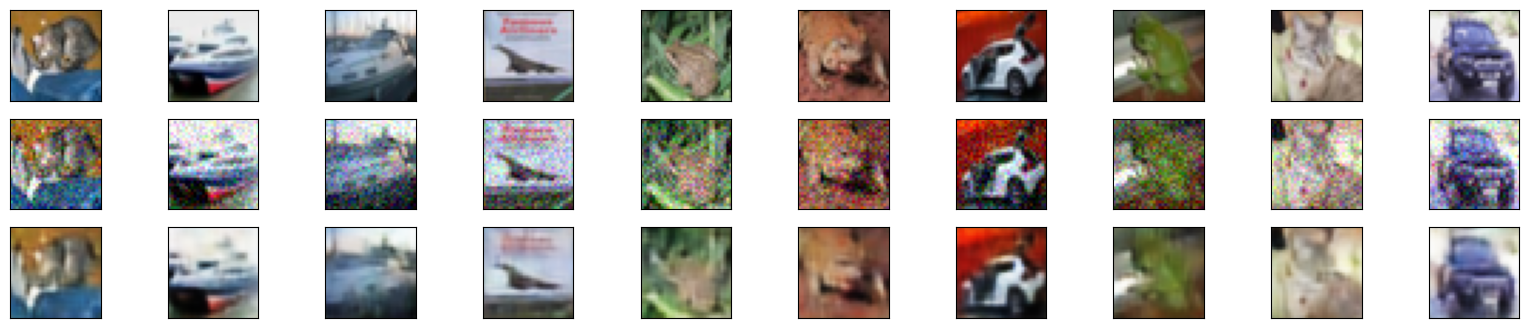

In [27]:
showOrigDec(x_val, x_val_noisy, c10val)

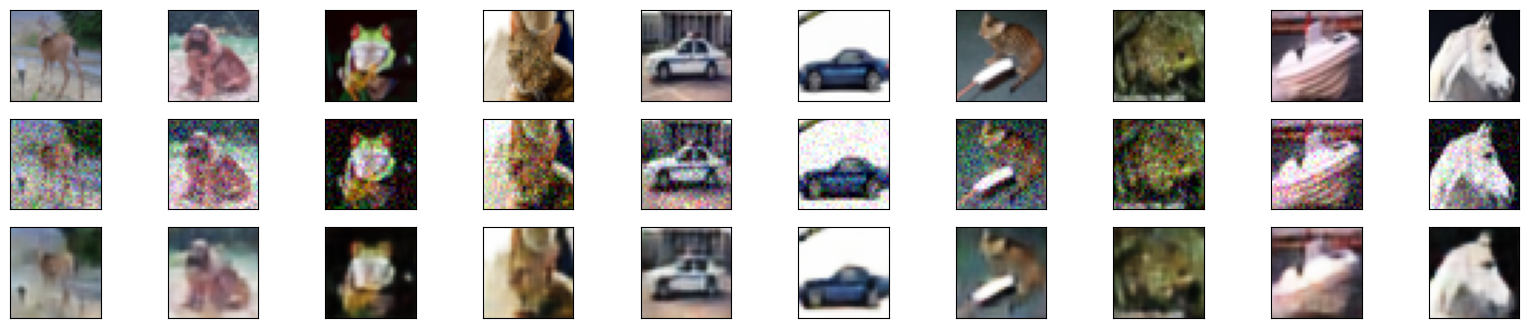

In [28]:
showOrigDec(x_val[100:], x_val_noisy[100:], c10val[100:])

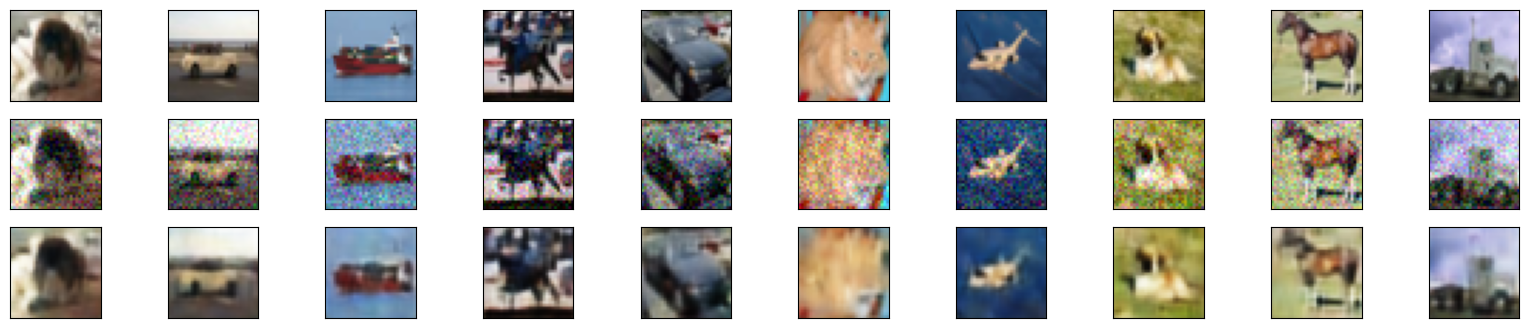

In [29]:
showOrigDec(x_val[200:], x_val_noisy[200:], c10val[200:])

# Crea un autoencoder con Minist que quite el ruido a las imágenes